#### Tensorflow基础

In [17]:
import tensorflow as tf

In [18]:
print(tf.__version__)  # 版本

1.14.0


In [7]:
# 简单例子一,向量乘法
# creat a variable
w = tf.Variable([[0.5,1.0]]) # 行向量 1*2
x = tf.Variable([[2.0],[1.0]]) # 列向量 2*1

y = tf.matmul(w,x)


# 初始化变量
init_op = tf.global_variables_initializer()

# 会话
with tf.Session() as sess:
    sess.run(init_op)   #操做
    print(y.eval())

[[2.]]


In [ ]:
# 初始化生成变量一
tf.zeros([3,4],tf.int32)
tensor = [[1,2,3],[4,5,6]]
tf.ones_like(tensor)

# 创建初始化生成变量二
norm = tf.random_normal([2,3],mean=0,stddev=4)  # 均值,标准差
c = tf.constant([[1,2],[3,4],[5,6]])
shuff = tf.random_shuffle(c)  # 洗牌操做

sess = tf.Session()
print(sess.run(norm))
print(sess.run(shuff))

# 创建初始化生成变量三
# array转换为tensor
import numpy as np
a = np.zeros((3,3))
ta = tf.convert_to_tensor(a)
with tf.Session() as sess:
    print(sess.run(ta))


# 函数操做
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)

out_op = tf.multiply (input1,input2)  #版本更新
with tf.Session() as sess:
    # 相当于函数传入参数
    print(sess.run([out_op],feed_dict={input1:[7.0],input2:[2.0]}))


# o小练习
### 线性回归--Tensorflow

W =  [0.9211695] b =  [0.] loss =  0.26449567
W =  [0.7135406] b =  [0.30930626] loss =  0.094620705
W =  [0.5607247] b =  [0.307256] loss =  0.05372636
W =  [0.4459832] b =  [0.30574703] loss =  0.030671436
W =  [0.35983014] b =  [0.304614] loss =  0.017673802
W =  [0.29514253] b =  [0.30376327] loss =  0.010346145
W =  [0.24657215] b =  [0.30312452] loss =  0.0062150448
W =  [0.21010333] b =  [0.3026449] loss =  0.003886062
W =  [0.1827209] b =  [0.30228478] loss =  0.0025730545
W =  [0.16216093] b =  [0.3020144] loss =  0.001832823
W =  [0.14672357] b =  [0.30181137] loss =  0.0014155033
W =  [0.1351325] b =  [0.30165893] loss =  0.0011802318
W =  [0.12642942] b =  [0.3015445] loss =  0.0010475934
W =  [0.11989475] b =  [0.30145854] loss =  0.0009728159
W =  [0.11498822] b =  [0.30139402] loss =  0.00093065883
W =  [0.11130418] b =  [0.30134556] loss =  0.00090689195
W =  [0.10853803] b =  [0.3013092] loss =  0.00089349295
W =  [0.10646109] b =  [0.30128187] loss =  0.00088593905
W 

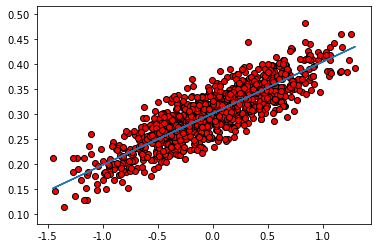

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# 生成样本点
num_points = 1000
vector_set = []
for i in range(num_points):
    x1 = np.random.normal(0.0,0.5)
    y1 = x1*0.1+0.3+np.random.normal(0.0,0.03)
    vector_set.append([x1,y1])

#生成一组样本
# print(vector_set)
x = [v[0] for v in vector_set]
y = [v[1] for v in vector_set]

# 初始化W和b,yp 相当于空盒子,并没有执行,可以起别名
W = tf.Variable(tf.random_uniform([1],-1.0,1.0),name = 'W')
b = tf.Variable(tf.zeros([1]),name='b')
yp = W * x + b
loss = tf.reduce_mean(tf.square(yp - y),name = 'loss') # 定义loss
optimizer = tf.train.GradientDescentOptimizer(0.5)  # 最优化方法和学习率
train = optimizer.minimize(loss,name = 'train') # 梯度操做和数字更新

# 定义一个Session()对象
sess = tf.Session()
# 初始化全部参数
init = tf.global_variables_initializer()
# 执行
sess.run(init)

print('W = ',sess.run(W),'b = ',sess.run(b),'loss = ', sess.run(loss))
for step in range(20):
    # 执行并更新参数
    sess.run(train)
    print('W = ',sess.run(W),'b = ',sess.run(b),'loss = ', sess.run(loss))    
# writer = tf.summary.FileWriter("./tmp",sess.graph)
# 绘图
plt.scatter(x,y,c = 'r',edgecolors= 'black')
plt.plot(x,sess.run(W) * x + sess.run(b))
plt.show()

### 手写字体--神经网络

1.查看mnist

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Download and Extract MNIST dataset
type of 'mnist' is <class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>
number of train data is 55000
number of test data is 10000
What does the data of MNIST look like?
type of 'trainimg' is <class 'numpy.ndarray'>
type of 'trainlabel' is <class 'numpy.ndarray'>
type of 'testimg' is <class 'numpy.ndarray'>
type of 'testlabel' is <class 'numpy.ndarray'>
shape of 'trainimg' is (55000, 784)
shape of 'trainlabel' is (55000, 10)
shape of 'testimg' is (10000, 784)
shape of 'testlabel' is (10000, 10)
How does the training data look like?


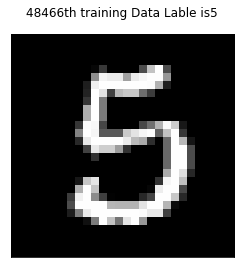

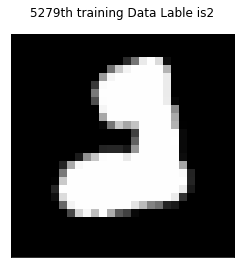

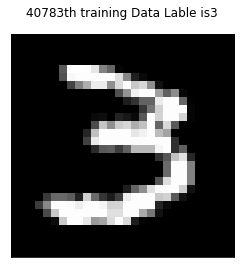

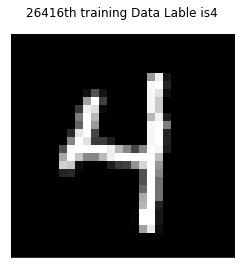

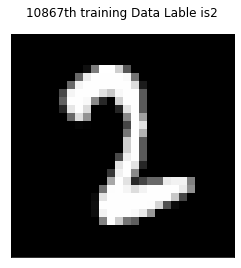

In [2]:
# pack 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

# 加载展现数据
mnist = input_data.read_data_sets('data/',one_hot=True)
print("Download and Extract MNIST dataset")
print("type of 'mnist' is %s"%(type(mnist)))
print("number of train data is %d"%(mnist.train.num_examples))
print("number of test data is %d"%(mnist.test.num_examples))

# 查看数据的类型,每一个图形数据是28*28像素点拉直成一行(784),lalel为10*1(排成一行)
# what does the data of MNIST look like?
print("What does the data of MNIST look like?")

trainimg = mnist.train.images
trainlabel = mnist.train.labels
testimg = mnist.test.images
testlabel = mnist.test.labels

print("type of 'trainimg' is %s"%(type(trainimg)))
print("type of 'trainlabel' is %s"%(type(trainlabel))) #label是one_hot格式[1,0,0,0,0,0,0,0,0,0]
print("type of 'testimg' is %s"%(type(testimg)))
print("type of 'testlabel' is %s"%(type(testlabel)))
print("shape of 'trainimg' is %s"%(trainimg.shape,)) # 加逗号  
print("shape of 'trainlabel' is %s"%(trainlabel.shape,))
print("shape of 'testimg' is %s"%(testimg.shape,))
print("shape of 'testlabel' is %s"%(testlabel.shape,))

#显示图片
# How does the training data look like?  # 随机展示
print("How does the training data look like?")
nsample = 5
#5500中随机的5个
randidx = np.random.randint(trainimg.shape[0],size = nsample)

for i in randidx:
    curr_img = np.reshape(trainimg[i,:],(28,28)) # 还原转成28 by 28 martrix矩阵
    curr_label = np.argmax(trainlabel[i,:])#Label,np.argmax返回沿轴axis最大值的索引0~9
    plt.matshow(curr_img,cmap = plt.get_cmap('gray'))  # 画像素图,要先标准化
    plt.title(""+str(i)+"th training Data Lable is"+str(curr_label))
    plt.xticks([])
    plt.yticks([])
    plt.show()

两层神经网络,Relu,728,10——tensorflow

In [78]:
# pack 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

# 加载展现数据
mnist = input_data.read_data_sets('data/',one_hot=True)
trainimg = mnist.train.images
trainlabel = mnist.train.labels
testimg = mnist.test.images
testlabel = mnist.test.labels

# 输入层到隐藏层1,参数矩阵为w1(784*256),隐藏层1到隐藏层2为w2(256*128),out(128*10)
n_hidden1 = 256
n_hidden2 = 128
n_input = 784
n_classes = 10

x = tf.placeholder("float",[None,n_input]) # 一个batch输入多少个数据
y = tf.placeholder("float",[None,n_classes])

#network parameters
stddev = 0.1
weights = {  # w1:784*256,w2:256*128,out:128*10
    'w1':tf.Variable(tf.random_normal([n_input,n_hidden1],stddev=stddev)),
    'w2':tf.Variable(tf.random_normal([n_hidden1,n_hidden2],stddev=stddev)),
    'out':tf.Variable(tf.random_normal([n_hidden2,n_classes],stddev=stddev))
}
biases = {
    'b1':tf.Variable(tf.random_normal([n_hidden1]))
    , 'b2':tf.Variable(tf.random_normal([n_hidden2]))
        , 'out':tf.Variable(tf.random_normal([n_classes]))

}
print("Network Ready")

#前
def multilayer_perception(_X,_weights,_biases):
    layer_1 = tf.nn.relu(tf.add(tf.matmul(_X,_weights['w1']),_biases['b1']))  # 由于x是行向量,所以只能是y = x*W,且容易定义W
    layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1,_weights['w2']),_biases['b2']))
    return tf.matmul(layer_2,_weights['out'])+_biases['out'] # 最后一层没有激活函数,获得得分

# 预测
pred = multilayer_perception(x,weights,biases)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optm = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

corr = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))  # 判断index是否相等
accr = tf.reduce_mean(tf.cast(corr,'float'))  # tf.cast()转类型,bool转成float,精度计算

init = tf.global_variables_initializer()
print('function ready ! GO! \n')


# start 
training_epochs = 20
batch_size = 100
display_step = 4# 每4个展示一次

#launch the graph
sess = tf.Session()
sess.run(init)  # 初始化开始
#optimize
for epoch in range(training_epochs):
    avg_cost = 0.
    total_batch = int(mnist.train.num_examples/batch_size)   # 一共迭代多少次是一个epoch
    for i in range(total_batch):
        #计算每一个epoch平均损失
        batch_xs,batch_ys = mnist.train.next_batch(batch_size)
        feeds = {x:batch_xs,y:batch_ys}   # 一个batch一个batch算,把None换成batch_x
        sess.run(optm,feed_dict = feeds)
        avg_cost += sess.run(cost,feed_dict = feeds)  
    
    avg_cost = avg_cost / total_batch  
    
    #display展示
    if(epoch+1) % display_step == 0:
        print("Epoch: %03d/%03d cost: %.9f"%(epoch,training_epochs,avg_cost))
        
        feeds = {x:batch_xs,y:batch_ys}  
        train_acc = sess.run(accr,feed_dict=feeds)   # 传入操做和数据
        print("Train accuracy: %.3f"%(train_acc))
        feeds = {x:mnist.test.images,y:mnist.test.labels}  # 测试集
        test_acc = sess.run(accr,feed_dict=feeds)  # 传入操做和数据
        print("Test accuracy:%.3f"%(test_acc))
print("Optimization finished")

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Network Ready
function ready ! GO! 

Epoch: 003/020 cost: 0.303026801
Train accuracy: 0.920
Test accuracy:0.915
Epoch: 007/020 cost: 0.228968697
Train accuracy: 0.950
Test accuracy:0.934
Epoch: 011/020 cost: 0.189894760
Train accuracy: 0.930
Test accuracy:0.944
Epoch: 015/020 cost: 0.162862125
Train accuracy: 0.960
Test accuracy:0.950
Epoch: 019/020 cost: 0.142101905
Train accuracy: 0.990
Test accuracy:0.955
Optimization finished


图片转一维数列

In [87]:
# coding=gbk  图片转矩阵,经过,预测
from PIL import Image
import numpy as np
# import scipy

def loadImage():
    # 读取图片
    im = Image.open(r"C:\Users\Administrator\Desktop\2.0.png")

    # 显示图片
    #im.show() 
    
    im = im.convert("L") 
    data = im.getdata()
    data = np.matrix(data)
#     print data 
    # 变换成512*512
    data = np.reshape(data,(28,28))
    new_im = Image.fromarray(data)
    # 显示图片
    data = data.tolist()
    data = [[i for j in data  for i in j]]
    
   
    new_im.show()
    return data
    
put = loadImage()
pred = multilayer_perception(tf.cast(put,tf.float32),weights,biases)
#sess.run(pred)
sess.run(tf.argmax(pred,1))

array([2], dtype=int64)

三层神经网络

In [89]:
#加多一层
# pack 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

# 加载展现数据
mnist = input_data.read_data_sets('data/',one_hot=True)
trainimg = mnist.train.images
trainlabel = mnist.train.labels
testimg = mnist.test.images
testlabel = mnist.test.labels

# 输入层到隐藏层1,参数矩阵为w1(784*256),隐藏层1到隐藏层2为w2(256*128),out(128*10)
n_hidden1 = 256
n_hidden2 = 128
n_hidden3 = 50 # 加多一层
n_input = 784
n_classes = 10

x = tf.placeholder("float",[None,n_input]) # 一个batch输入多少个数据
y = tf.placeholder("float",[None,n_classes])

#network parameters
stddev = 0.1
weights = {  # w1:784*256,w2:256*128,out:128*10
    'w1':tf.Variable(tf.random_normal([n_input,n_hidden1],stddev=stddev)),
    'w2':tf.Variable(tf.random_normal([n_hidden1,n_hidden2],stddev=stddev)),
     'w3':tf.Variable(tf.random_normal([n_hidden2,n_hidden3],stddev=stddev)),  # 加多一层
    'out':tf.Variable(tf.random_normal([n_hidden3,n_classes],stddev=stddev))
}
biases = {
    'b1':tf.Variable(tf.random_normal([n_hidden1]))
    , 'b2':tf.Variable(tf.random_normal([n_hidden2]))
    , 'b3':tf.Variable(tf.random_normal([n_hidden3]))  # 加多一层
        , 'out':tf.Variable(tf.random_normal([n_classes]))

}
print("Network Ready")

#前
def multilayer_perception(_X,_weights,_biases):
    layer_1 = tf.nn.relu(tf.add(tf.matmul(_X,_weights['w1']),_biases['b1']))  # 由于x是行向量,所以只能是y = x*W,且容易定义W
    layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1,_weights['w2']),_biases['b2']))
    layer_3 = tf.nn.relu(tf.add(tf.matmul(layer_2,_weights['w3']),_biases['b3']))  # 加多一层
    return tf.matmul(layer_3,_weights['out'])+_biases['out'] # 最后一层没有激活函数,获得得分

# 预测
pred = multilayer_perception(x,weights,biases)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optm = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

corr = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))  # 判断index是否相等
accr = tf.reduce_mean(tf.cast(corr,'float'))  # tf.cast()转类型,bool转成float,精度计算

init = tf.global_variables_initializer()
print('function ready ! GO! \n')


# start 
training_epochs = 20
batch_size = 100
display_step = 4# 每4个展示一次

#launch the graph
sess = tf.Session()
sess.run(init)  # 初始化开始
#optimize
for epoch in range(training_epochs):
    avg_cost = 0.
    total_batch = int(mnist.train.num_examples/batch_size)   # 一共迭代多少次是一个epoch
    for i in range(total_batch):
        #计算每一个epoch平均损失
        batch_xs,batch_ys = mnist.train.next_batch(batch_size)
        feeds = {x:batch_xs,y:batch_ys}   # 一个batch一个batch算,把None换成batch_x
        sess.run(optm,feed_dict = feeds)
        avg_cost += sess.run(cost,feed_dict = feeds)  
    
    avg_cost = avg_cost / total_batch  
    
    #display展示
    if(epoch+1) % display_step == 0:
        print("Epoch: %03d/%03d cost: %.9f"%(epoch,training_epochs,avg_cost))
        
        feeds = {x:batch_xs,y:batch_ys}  
        train_acc = sess.run(accr,feed_dict=feeds)   # 传入操做和数据
        print("Train accuracy: %.3f"%(train_acc))
        feeds = {x:mnist.test.images,y:mnist.test.labels}  # 测试集
        test_acc = sess.run(accr,feed_dict=feeds)  # 传入操做和数据
        print("Test accuracy:%.3f"%(test_acc))
print("Optimization finished")

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Network Ready
function ready ! GO! 

Epoch: 003/020 cost: 0.300837529
Train accuracy: 0.890
Test accuracy:0.908
Epoch: 007/020 cost: 0.219374354
Train accuracy: 0.920
Test accuracy:0.927
Epoch: 011/020 cost: 0.172693912
Train accuracy: 0.990
Test accuracy:0.941
Epoch: 015/020 cost: 0.140658150
Train accuracy: 0.920
Test accuracy:0.950
Epoch: 019/020 cost: 0.117211448
Train accuracy: 0.960
Test accuracy:0.955
Optimization finished


# CNN

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data


# ssettings
learning_rate = 1e-4
#迭代次数
training_iterations = 1000
dropout = 0.5  # 保留50%
batch_size = 50
image_width = image_height = 28

# 导入数据
# 导不了数据时
# pd.read_csv('***.csv')
# 数据类型为
# 42000*785(含标签) 一个像素点一行
# 需要标准化  images = np.multiply(images,1.0/225.0)
# label 需要one_hot
'''
def dens_to_one_hot(labels_dense,num_classes):
    num_labels = labels_denses.shape[0]  # 个数
    index_offset = np.arange(num_labels)*num_classes  
    labels_one_hot = np.zeros((num_lables,num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1  #flat 实现装成1维进行操作
    return labels_one_hot  # 返回的还是矩阵
'''

# 加载展现数据,数据已经标准化处理,ont_hot处理过
mnist = input_data.read_data_sets('data/',one_hot=True)
trainimg = mnist.train.images
trainlabel = mnist.train.labels
testimg = mnist.test.images
testlabel = mnist.test.labels
# print(trainlabel[0])  # [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]



# 各个权值
def weight_variable(shape):
    initial = tf.random_normal(shape,stddev=0.1)  # 高斯初始化
    return tf.Variable(initial)
def bias_variable(shape):
    initial = tf.constant(0.1,shape = shape)
    return tf.Variable(initial)
# 卷积层
def conv2d(x,W):
    return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME') # strides滑动
#pooling,一个2*2
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],strides=[1, 2, 2, 1], padding='SAME')


# 传入一个batch的数据
x = tf.placeholder('float',shape=[None,784])
y = tf.placeholder('float',shape=[None,10])

# (55000,784)==>(55000,28,28,1)
image = tf.reshape(x,[-1,image_width,image_height,1])  # -1自动求解转化
print(f'image_shape:{image.get_shape()}')


# 第一层卷积
W_conv1 = weight_variable([5, 5, 1, 32])  # 每个个filter5*5*1个颜色通道,如果是 rgb 彩色图,则为3,32个
b_conv1 = bias_variable([32])


# 操作开始,卷积+Relu
h_conv1 = tf.nn.relu(conv2d(image, W_conv1) + b_conv1)
print(f'h_conv1_shape:{h_conv1.get_shape()}')
# max pooling
h_pool1 = max_pool_2x2(h_conv1)
print(f'h_pool1_shape:{h_pool1.get_shape()}')


#第二层卷积
W_conv2 = weight_variable([5, 5, 32, 64])  # 64 个5*5*64 filter
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
print(f'h_conv2_shape:{h_conv2.get_shape()}')
h_pool2 = max_pool_2x2(h_conv2)
print(f'h_pool2_shape:{h_pool2.get_shape()}')


# 加全连接层一,参数初始化
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64]) # 拉长

h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1) # 矩阵乘法
print(f'h_fc1_shape:{h_fc1.get_shape()}')



# dropout 防止过拟合
keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# 全连接层二,得到概率值
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])




# 最终输出为 y_conv
y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)
print(f'y_conv.shape:{y_conv.get_shape()}')

# cost function
cross_entropy = -tf.reduce_sum(y*tf.log(y_conv))
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))  # 精度,和ANN一样



train_accuracies = []
test_accuracies = []
x_range = []
display_step = 10

print('Training start Go! \n')
init = tf.global_variables_initializer()
sess = tf.InteractiveSession()
sess.run(init)


# for i in range(training_iterations):
#     batch_xs,batch_ys = mnist.train.next_batch(batch_size)
#     if i%display_step == 0 or (i+1) == training_iterations:
#         train_accuracy = accuracy.eval(feed_dict={x:batch_xs,y:batch_ys,keep_prob:1.0})
#         x_range.append(i)
#         if (1000):
#             test_accuracy = accuracy.eval(feed_dict={x:mnist.test.images[0:batch_size],y:mnist.test.labels[0:batch_size],keep_prob:1.0})
#             print("train_accuracy/test_accuracy = > %.2f / %.2f for step %d"%(train_accuracy,test_accuracy,i))
#             test_accuracies.append(test_accuracy)
        
        
#         else:
#             print('train_accuracy = > %.4f for step %d'%(train_accuracy,i))
#         train_accuracies.append(train_accuracy)
#     if i %(display_step*10) == 0 and i:  # 选择性跳过某些
#         display_step *= 10
#     sess.run(train_step,feed_dict = {x:batch_xs,y:batch_ys,keep_prob:dropout})



# 一次测试
x_range = []
train_accuracies = []

for i in range(900):
    batch = mnist.train.next_batch(50)
    #每100步报告一次验证集上的准确率
    if i % 100 == 0:
        x_range.append(i)
        train_accuracy = accuracy.eval(feed_dict={x:batch[0], y:batch[1], keep_prob:1.0})
        print("step %d, training accuracy %g" % (i, train_accuracy))
        train_accuracies.append(train_accuracy)
        
    train_step.run(feed_dict = {x : batch[0], y: batch[1], keep_prob : 0.5})
    
#训练结束后，报告在测试集上的准确率
test_accuracy = accuracy.eval(feed_dict={x:mnist.test.images[:50],y:mnist.test.labels[:50], keep_prob:1.0})
print("test accuracy %g" %test_accuracy )
print('over')

D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is depr

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
image_shape:(?, 28, 28, 1)
h_conv1_shape:(?, 28, 28, 32)
h_pool1_shape:(?, 14, 14, 32)
h_conv2_shape:(?, 14, 14, 64)
h_pool2_shape:(?, 7, 7, 64)
h_fc1_shape:(?, 1024)
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
y_conv.shape:(?, 10)
Training start Go! 

s

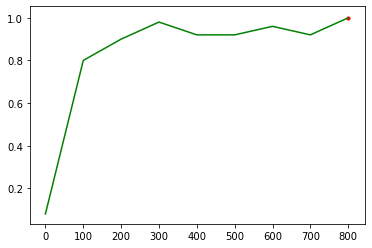

In [2]:
# 效果展示
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

plt.plot(x_range,train_accuracies,c='g')
plt.scatter(x_range[-1],test_accuracy,c='r',s = 10)